In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('Housing.xls')
# Display basic info about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

Dataset Shape: (545, 13)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              542 non-null    float64
 2   bedrooms          545 non-null    int64  
 3   bathrooms         544 non-null    float64
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 55.5+ KB
None

First few rows:
      price    area  bedrooms  bathrooms  stories mainroad guestr

In [6]:
# Statisticay numerical variables
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
summary = df.describe() n
summary

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,542.000000,545.000000,544.000000,545.000000,545.000000
mean,4.766729e+06,5127.167897,3.691743,1.284926,1.805505,0.693578
std,1.870440e+06,2143.732761,17.023136,0.501997,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3588.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4540.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,400.000000,4.000000,4.000000,3.000000


In [8]:
df.dtypes

price                 int64
area                float64
bedrooms              int64
bathrooms           float64
stories               int64
mainroad             object
guestroom            object
basement             object
hotwaterheating      object
airconditioning      object
parking               int64
prefarea             object
furnishingstatus     object
dtype: object

In [12]:
# To include median and missing values
summary2 = df.describe()
summary2.loc["median"] = df.median(numeric_only=True)
print(summary2)

               price          area    bedrooms   bathrooms     stories  \
count   5.450000e+02    542.000000  545.000000  544.000000  545.000000   
mean    4.766729e+06   5127.167897    3.691743    1.284926    1.805505   
std     1.870440e+06   2143.732761   17.023136    0.501997    0.867492   
min     1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%     3.430000e+06   3588.000000    2.000000    1.000000    1.000000   
50%     4.340000e+06   4540.000000    3.000000    1.000000    2.000000   
75%     5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max     1.330000e+07  16200.000000  400.000000    4.000000    4.000000   
median  4.340000e+06   4540.000000    3.000000    1.000000    2.000000   

           parking  
count   545.000000  
mean      0.693578  
std       0.861586  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       3.000000  
median    0.000000  


In [11]:
df[numerical_cols].median()

price        4340000.0
area            4540.0
bedrooms           3.0
bathrooms          1.0
stories            2.0
parking            0.0
dtype: float64

In [10]:
print(df.isnull().sum())

price               0
area                3
bedrooms            0
bathrooms           1
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [15]:
# handling missing values (mean, median, mode)
df.isnull()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
# handling missing values (mean, median, mode)
#fFor area - use median imputation (strong to outliers)
area_median = df['area'].median()
df['area'].fillna(area_median, inplace=True)
print(f"Area: {df['area'].isnull().sum()} missing values after making imputation")

Area: 0 missing values after making imputation


C:\Users\user\AppData\Local\Temp\ipykernel_17180\2264178942.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['area'].fillna(area_median, inplace=True)


In [17]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           1
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [18]:
# For bathrooms - use mode imputation (categorical data)
bathrooms_mode = df['bathrooms'].mode()[0]
df['bathrooms'].fillna(bathrooms_mode, inplace=True)
print(f"Bathrooms: {df['bathrooms'].isnull().sum()} missing values after mode imputation")

Bathrooms: 0 missing values after mode imputation


C:\Users\user\AppData\Local\Temp\ipykernel_17180\2195888758.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bathrooms'].fillna(bathrooms_mode, inplace=True)


In [19]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [20]:
#Detecting and Handling Duplicate Records
duplicates = df.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")

Number of duplicate records: 0


In [22]:
# Detecting and Handling Data Inconsistency
print(df.dtypes)

price                 int64
area                float64
bedrooms              int64
bathrooms           float64
stories               int64
mainroad             object
guestroom            object
basement             object
hotwaterheating      object
airconditioning      object
parking               int64
prefarea             object
furnishingstatus     object
dtype: object


In [26]:
# checking data of categorical data 
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                   'airconditioning', 'prefarea', 'furnishingstatus']
for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col}: {df[col].unique()}")


mainroad: ['yes' 'no']

guestroom: ['no' 'yes']

basement: ['no' 'yes']

hotwaterheating: ['no' 'yes']

airconditioning: ['yes' 'no']

prefarea: ['yes' 'no']

furnishingstatus: ['furnished' 'semi-furnished' 'unfurnished']


In [30]:
bedroom_outlier = df[df['bedrooms'] > 10]
bedroom_outlier


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
13,9240000,3500.0,400,2.0,2,yes,no,no,yes,no,2,no,furnished


In [39]:
# we have to handle that outlier because  for that room  400 
if len(bedroom_outlier) > 0:
    print(f"Found bedroom outlier: {bedroom_outlier['bedrooms'].values}")
     # Replace with median
    df.loc[df['bedrooms'] > 10, 'bedrooms'] = df['bedrooms'].median()
    print("Fixed bedroom outlier (400 -> median value)")

Found bedroom outlier: [400]
Fixed bedroom outlier (400 -> median value)


In [41]:
#Standardize categorical values (convert to lowercase for consistency)
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.lower()

In [46]:
# 3. Check for None value
none_value = (df == 'None').sum().sum()
none_value
if none_value > 0:
    df.replace('None', np.nan, inplace=True)
        # Re-impute any new missing values
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            if df[col].dtype in ['int64', 'float64']:
                df[col].fillna(df[col].median(), inplace=True)
            else:
                df[col].fillna(df[col].mode()[0], inplace=True)

In [47]:
# Verify data consistency after cleaning
print(f"Dataset shape: {df.shape}")
print(f"Data types:\n{df.dtypes}")
print(f"Missing values: {df.isnull().sum().sum()}")


Dataset shape: (545, 13)
Data types:
price                 int64
area                float64
bedrooms              int64
bathrooms           float64
stories               int64
mainroad             object
guestroom            object
basement             object
hotwaterheating      object
airconditioning      object
parking               int64
prefarea             object
furnishingstatus     object
dtype: object
Missing values: 0


In [50]:
# Final statistical summary
print("\n" + "="*100)
print(" STATISTICAL SUMMARY AFTER PREPROCESSING")


 STATISTICAL SUMMARY AFTER PREPROCESSING


In [51]:
for col in numerical_cols:
    if col in df.columns:
        print(f"\n{col.upper()}:")
        print(f"  Min: {df[col].min():,} | Max: {df[col].max():,} | Mean: {df[col].mean():,.0f} | Std: {df[col].std():,.0f}")


PRICE:
  Min: 1,750,000 | Max: 13,300,000 | Mean: 4,766,729 | Std: 1,870,440

AREA:
  Min: 1,650.0 | Max: 16,200.0 | Mean: 5,124 | Std: 2,138

BEDROOMS:
  Min: 1 | Max: 6 | Mean: 3 | Std: 1

BATHROOMS:
  Min: 1.0 | Max: 4.0 | Mean: 1 | Std: 1

STORIES:
  Min: 1 | Max: 4 | Mean: 2 | Std: 1

PARKING:
  Min: 0 | Max: 3 | Mean: 1 | Std: 1


In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [63]:
# Function to detect outliers using IQR method
def outliers_detector (data,column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [64]:
# Function to detect outliers using Z-score method
def detect_outliers_zscore(data, column, threshold=3):
    z_scores = np.abs(stats.zscore(data[column]))
    outliers = data[z_scores > threshold]
    return outliers

In [66]:
# outliers  detected for  numerical variable
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

outlier_summary = {}
for col in numerical_cols:
    print(f"\n--- {col.upper()} OUTLIERS ---")
    
    # IQR method
    iqr_outliers, lower, upper = outliers_detector(df, col)
    iqr_count = len(iqr_outliers)
    
    # Z-score method
    z_outliers = detect_outliers_zscore(df, col)
    z_count = len(z_outliers)
    
    print(f"IQR outliers: {iqr_count} ({iqr_count/len(df)*100:.1f}%)")
    print(f"Z-score outliers: {z_count} ({z_count/len(df)*100:.1f}%)")
    print(f"IQR bounds: [{lower:.2f}, {upper:.2f}]")
    print(f"Data range: [{df[col].min():.2f}, {df[col].max():.2f}]")
    
    outlier_summary[col] = {
        'iqr_count': iqr_count,
        'z_count': z_count,
        'iqr_outliers': iqr_outliers
    }



--- PRICE OUTLIERS ---
IQR outliers: 15 (2.8%)
Z-score outliers: 6 (1.1%)
IQR bounds: [-35000.00, 9205000.00]
Data range: [1750000.00, 13300000.00]

--- AREA OUTLIERS ---
IQR outliers: 11 (2.0%)
Z-score outliers: 6 (1.1%)
IQR bounds: [-540.00, 10500.00]
Data range: [1650.00, 16200.00]

--- BEDROOMS OUTLIERS ---
IQR outliers: 12 (2.2%)
Z-score outliers: 2 (0.4%)
IQR bounds: [0.50, 4.50]
Data range: [1.00, 6.00]

--- BATHROOMS OUTLIERS ---
IQR outliers: 1 (0.2%)
Z-score outliers: 11 (2.0%)
IQR bounds: [-0.50, 3.50]
Data range: [1.00, 4.00]

--- STORIES OUTLIERS ---
IQR outliers: 41 (7.5%)
Z-score outliers: 0 (0.0%)
IQR bounds: [-0.50, 3.50]
Data range: [1.00, 4.00]

--- PARKING OUTLIERS ---
IQR outliers: 12 (2.2%)
Z-score outliers: 0 (0.0%)
IQR bounds: [-1.50, 2.50]
Data range: [0.00, 3.00]


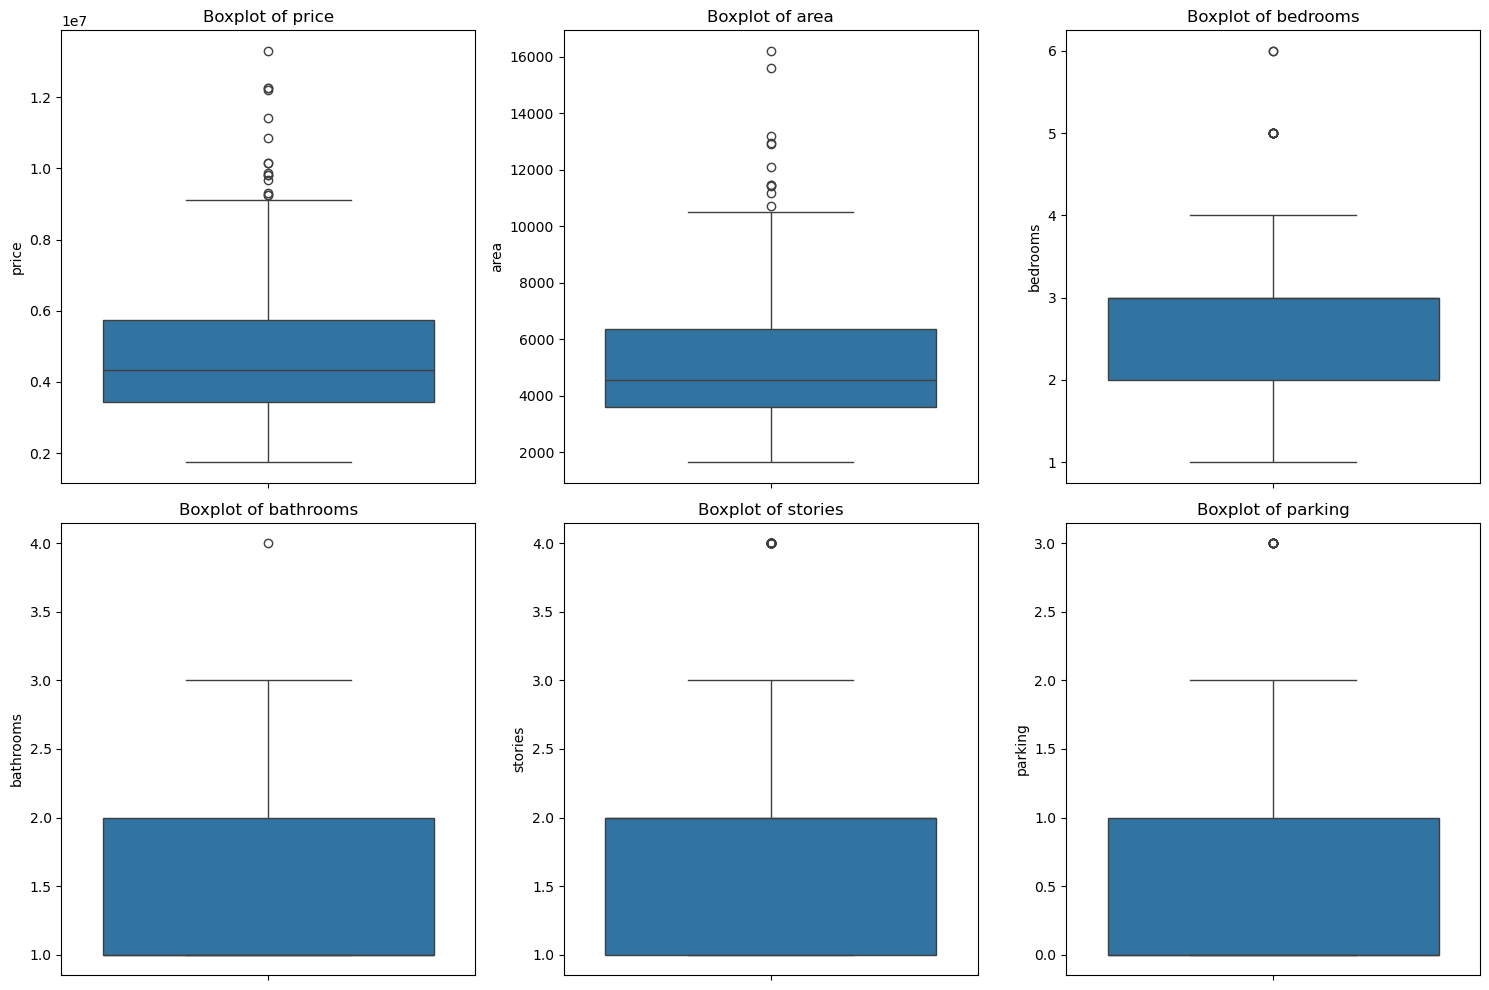

In [68]:
# visualisation 
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [70]:
# Handle outliers based on domain knowledge
print("OUTLIER HANDLING ")
# Price: Winsorize extreme outliers (keep but cap)
price_quant = df['price'].quantile(0.99)
price_outliers = df[df['price'] > price_quant]
print(f"Price: {len(price_outliers)} extreme outliers (>99th percentile)")



OUTLIER HANDLING 
Price: 6 extreme outliers (>99th percentile)


In [73]:
# Area: Winsorize extreme values
area_quant = df['area'].quantile(0.99)
area_outliers = df[df['area'] > area_quant]
df['area_original'] = df['area']
df.loc[df['area'] > area_quant, 'area'] = area_quant
print(f"Area: {len(area_outliers)} extreme outliers (>99th percentile)")
df['area_original'] = df['area']
df.loc[df['area'] > area_quant, 'area'] = area_quant
print(f"Area: {len(area_outliers)} extreme outliers (>99th percentile)")
df['area_original'] = df['area']
df.loc[df['area'] > area_quant, 'area'] = area_quant

Area: 6 extreme outliers (>99th percentile)
Area: 6 extreme outliers (>99th percentile)


In [74]:
print(f"\nOutlier handling completed. Dataset shape: {df.shape}")


Outlier handling completed. Dataset shape: (545, 14)


In [83]:
#6. 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import warnings
warnings.filterwarnings('ignore')
# Create copies for different scaling techniques
df_scaled = df.copy()
# Identify which variables require scaling

scaling_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
print("Variable Characteristics for Scaling :")
for col in scaling_columns:
    print(f"\n{col}:")
    print(f"  Range: {df[col].min():.2f} to {df[col].max():.2f}")
    print(f"  Mean: {df[col].mean():.2f}, Std: {df[col].std():.2f}")
    print(f"  Recommended scaling: ", end="")
    if col in ['price', 'area']:
        print("Robust Scaling ")
        scaler = RobustScaler()
        df_scaled[f'{col}_robust'] = scaler.fit_transform(df[[col]])
    elif col in ['bedrooms', 'bathrooms', 'stories', 'parking']:
        print("Min-Max Scaling ")
        scaler = MinMaxScaler()
        df_scaled[f'{col}_minmax'] = scaler.fit_transform(df[[col]])
    else:
        print("Standard Scaling (normal distribution)")
        scaler = StandardScaler()
        df_scaled[f'{col}_standard'] = scaler.fit_transform(df[[col]])


Variable Characteristics for Scaling :

price:
  Range: 1750000.00 to 13300000.00
  Mean: 4766729.25, Std: 1870439.62
  Recommended scaling: Robust Scaling 

area:
  Range: 1650.00 to 11657.57
  Mean: 5100.10, Std: 2045.11
  Recommended scaling: Robust Scaling 

bedrooms:
  Range: 1.00 to 6.00
  Mean: 2.96, Std: 0.74
  Recommended scaling: Min-Max Scaling 

bathrooms:
  Range: 1.00 to 4.00
  Mean: 1.28, Std: 0.50
  Recommended scaling: Min-Max Scaling 

stories:
  Range: 1.00 to 4.00
  Mean: 1.81, Std: 0.87
  Recommended scaling: Min-Max Scaling 

parking:
  Range: 0.00 to 3.00
  Mean: 0.69, Std: 0.86
  Recommended scaling: Min-Max Scaling 


In [86]:
# Also apply StandardScaler 
scaler_standard = StandardScaler()
df_scaled[['price_standard', 'area_standard', 'bedrooms_standard', 
           'bathrooms_standard', 'stories_standard', 'parking_standard']] = \
    scaler_standard.fit_transform(df[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']])

# Display scaling results

print("SCALING RESULTS ")
scaled_columns = [col for col in df_scaled.columns if any(x in col for x in ['_robust', '_minmax', '_standard'])]
for col in scaled_columns:
    if col in df_scaled.columns:
        print(f"\n{col}:")
        print(f"  Min: {df_scaled[col].min():.3f}, Max: {df_scaled[col].max():.3f}")
        print(f"  Mean: {df_scaled[col].mean():.3f}, Std: {df_scaled[col].std():.3f}")


SCALING RESULTS 

price_robust:
  Min: -1.121, Max: 3.879
  Mean: 0.185, Std: 0.810

area_robust:
  Min: -1.047, Max: 2.579
  Mean: 0.203, Std: 0.741

bedrooms_minmax:
  Min: 0.000, Max: 1.000
  Mean: 0.393, Std: 0.147

bathrooms_minmax:
  Min: 0.000, Max: 1.000
  Mean: 0.095, Std: 0.167

stories_minmax:
  Min: 0.000, Max: 1.000
  Mean: 0.269, Std: 0.289

parking_minmax:
  Min: 0.000, Max: 1.000
  Mean: 0.231, Std: 0.287

price_standard:
  Min: -1.614, Max: 4.566
  Mean: 0.000, Std: 1.001

area_standard:
  Min: -1.689, Max: 3.209
  Mean: -0.000, Std: 1.001

bedrooms_standard:
  Min: -2.667, Max: 4.126
  Mean: -0.000, Std: 1.001

bathrooms_standard:
  Min: -0.567, Max: 5.418
  Mean: -0.000, Std: 1.001

stories_standard:
  Min: -0.929, Max: 2.532
  Mean: -0.000, Std: 1.001

parking_standard:
  Min: -0.806, Max: 2.679
  Mean: 0.000, Std: 1.001


In [89]:
!pip install category_encoders

In [90]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from category_encoders import BinaryEncoder, TargetEncoder, OrdinalEncoder

In [92]:

# Categorical variables in the dataset
categorical_vars = {
    'mainroad': 'binary',
    'guestroom': 'binary', 
    'basement': 'binary',
    'hotwaterheating': 'binary',
    'airconditioning': 'binary',
    'prefarea': 'binary',
    'furnishingstatus': 'ordinal'
}

print("Categorical Variables Analysis:")
for var, var_type in categorical_vars.items():
    print(f"\n{var}:")
    print(f"  Type: {var_type}")
    print(f"  Unique values: {df[var].unique()}")
    print(f"  Value counts:\n{df[var].value_counts()}")
# Create encoded dataset
df_encoded = df.copy()

# 1. LABEL ENCODING - For binary variables
print("\n" + "="*50)
print("1. LABEL ENCODING (Binary Variables)")
print("="*50)

binary_vars = [var for var, var_type in categorical_vars.items() if var_type == 'binary']
label_encoder = LabelEncoder()

for var in binary_vars:
    df_encoded[f'{var}_label'] = label_encoder.fit_transform(df[var])
    print(f"{var}: {dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))}")

Categorical Variables Analysis:

mainroad:
  Type: binary
  Unique values: ['yes' 'no']
  Value counts:
mainroad
yes    468
no      77
Name: count, dtype: int64

guestroom:
  Type: binary
  Unique values: ['no' 'yes']
  Value counts:
guestroom
no     448
yes     97
Name: count, dtype: int64

basement:
  Type: binary
  Unique values: ['no' 'yes']
  Value counts:
basement
no     354
yes    191
Name: count, dtype: int64

hotwaterheating:
  Type: binary
  Unique values: ['no' 'yes']
  Value counts:
hotwaterheating
no     520
yes     25
Name: count, dtype: int64

airconditioning:
  Type: binary
  Unique values: ['yes' 'no']
  Value counts:
airconditioning
no     373
yes    172
Name: count, dtype: int64

prefarea:
  Type: binary
  Unique values: ['yes' 'no']
  Value counts:
prefarea
no     417
yes    128
Name: count, dtype: int64

furnishingstatus:
  Type: ordinal
  Unique values: ['furnished' 'semi-furnished' 'unfurnished']
  Value counts:
furnishingstatus
semi-furnished    227
unfurnished 

In [93]:
# 2. ONE-HOT ENCODING - For nominal variables
print("\n" + "="*50)
print("2. ONE-HOT ENCODING (All Categorical Variables)")
print("="*50)

# Apply one-hot encoding to all categorical variables
onehot_encoded = pd.get_dummies(df[categorical_vars.keys()], prefix=categorical_vars.keys())
df_encoded = pd.concat([df_encoded, onehot_encoded], axis=1)
print("One-hot encoded columns created:")
onehot_columns = [col for col in df_encoded.columns if any(f"{var}_" in col for var in categorical_vars.keys())]
print(f"Total one-hot columns: {len(onehot_columns)}")


2. ONE-HOT ENCODING (All Categorical Variables)
One-hot encoded columns created:
Total one-hot columns: 21


In [94]:
# 3. BINARY ENCODING - Alternative for high-cardinality (demonstration)
print("\n" + "="*50)
print("3. BINARY ENCODING (Demonstration)")
print("="*50)

# For furnishingstatus (though low cardinality, for demonstration)
binary_encoder = BinaryEncoder(cols=['furnishingstatus'])
df_binary_encoded = binary_encoder.fit_transform(df[['furnishingstatus']])
df_encoded = pd.concat([df_encoded, df_binary_encoded.add_prefix('furnishingstatus_binary_')], axis=1)
print("Binary encoding for furnishingstatus:")
print(df_binary_encoded.head())

# 4. ORDINAL ENCODING - For furnishingstatus (natural order)
print("\n" + "="*50)
print("4. ORDINAL ENCODING (Furnishing Status)")
print("="*50)

furnishing_order = ['unfurnished', 'semi-furnished', 'furnished']
ordinal_mapping = {k: v for v, k in enumerate(furnishing_order)}

df_encoded['furnishingstatus_ordinal'] = df['furnishingstatus'].map(ordinal_mapping)
print(f"Ordinal mapping: {ordinal_mapping}")
print(f"Encoded values: {df_encoded['furnishingstatus_ordinal'].value_counts().sort_index()}")
# 5. TARGET ENCODING - Using price as target
print("\n" + "="*50)
print("5. TARGET ENCODING")
print("="*50)

# Without smoothing
for var in categorical_vars.keys():
    target_mean = df.groupby(var)['price'].mean()
    df_encoded[f'{var}_target'] = df[var].map(target_mean)
    print(f"{var} target encoding (mean price):")
    for category, mean_price in target_mean.items():
        print(f"  {category}: {mean_price:,.0f}")


3. BINARY ENCODING (Demonstration)
Binary encoding for furnishingstatus:
   furnishingstatus_0  furnishingstatus_1
0                   0                   1
1                   0                   1
2                   1                   0
3                   0                   1
4                   0                   1

4. ORDINAL ENCODING (Furnishing Status)
Ordinal mapping: {'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2}
Encoded values: furnishingstatus_ordinal
0    178
1    227
2    140
Name: count, dtype: int64

5. TARGET ENCODING
mainroad target encoding (mean price):
  no: 3,398,905
  yes: 4,991,777
guestroom target encoding (mean price):
  no: 4,544,546
  yes: 5,792,897
basement target encoding (mean price):
  no: 4,509,966
  yes: 5,242,615
hotwaterheating target encoding (mean price):
  no: 4,728,593
  yes: 5,559,960
airconditioning target encoding (mean price):
  no: 4,191,940
  yes: 6,013,221
prefarea target encoding (mean price):
  no: 4,425,299
  yes: 5,879,046

In [97]:
# Main modeling dataset
df.to_csv("cleaned_dataset.csv", index=False)
